In [207]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.quantum_info.operators import Operator
import numpy as np
from typing import List

### Deustch algoritmas (uždaviniai D1,D2,D3)

1. **(D1)** Parašykite funkciją, kuri pagal užduotą vieno  kubito Deustch funkciją sukonstruoja atitinkamą unitarinę matricą $U_f$ Deustch algoritmui. Deustch funkcija perduodama kaip dviejų simbolių tekstinė eilutė. Pvz. '10' reiškia, kad $f(0)=1$, o $f(1)=0$

In [208]:
def constructUnitary(values:str) -> Operator:
    if values == "00":
        matrix = np.identity(4)
    elif values == "01":
        matrix = np.array([[1, 0, 0, 0], # generalize this
                            [0, 1, 0, 0],
                            [0, 0, 0, 1],
                            [0, 0, 1, 0]])
    elif values == "10":
        matrix = np.array([[0, 1, 0, 0],
                            [1, 0, 0, 0],
                            [0, 0, 1, 0],
                            [0, 0, 0, 1]])
    elif values == "11":
        matrix = np.array([[0, 0, 1, 0],
                            [0, 0, 0, 1],
                            [1, 0, 0, 0],
                            [0, 1, 0, 0]])
    else:
        raise ValueError("Invalid input")
    return Operator(matrix)

2. **(D2)** Panaudokite anksčiau parašytą funkciją nuosavai Deustch algorimo implementacijai qiskit aplinkoje.

{'1': 1024}


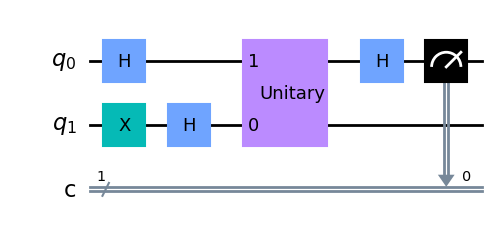

In [209]:
def deuchAlgorithm(qc:QuantumCircuit, values:str = "10"):
    qc.x(1)
    # qc.barrier()
    qc.h(0)
    qc.h(1)
    qc.append(constructUnitary(values), [1,0])
    qc.h(0)

qc = QuantumCircuit(2,1)
deuchAlgorithm(qc)
qc.measure(0, 0)

backend = Aer.get_backend('qasm_simulator')

job = execute(qc, backend)
result = job.result()
print (result.get_counts(qc))
qc.draw(output='mpl')

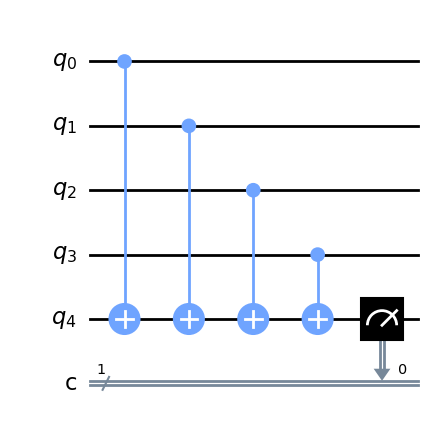

In [210]:
def onesCount() -> int:
    measureQubit = 4
    qubits = [0,1,2,3]
    qc = QuantumCircuit(5)
    for i in range(len(qubits)):
        qc.cx(i, measureQubit)
    return qc.to_gate()
qc = QuantumCircuit(5,1)
qc.append(onesCount(), [0,1,2,3,4])
qc.measure(4, 0)

backend = Aer.get_backend('qasm_simulator')
qc.decompose().draw(output='mpl')

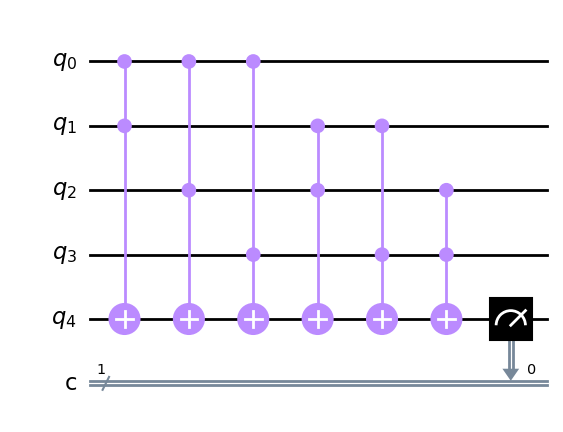

In [211]:
def countTwos():
    qc = QuantumCircuit(5)
    qubits = [0,1,2,3]
    measureQubit = 4
    for i in range(len(qubits)):
        for j in range(i+1, len(qubits)):
            if list[i] != list[j]:
                qc.ccx(i, j, measureQubit)
    return qc.to_gate()

qc = QuantumCircuit(5,1)
qc.append(countTwos(), [0,1,2,3,4])
qc.measure(4, 0)

backend = Aer.get_backend('qasm_simulator')
qc.decompose().draw(output='mpl')



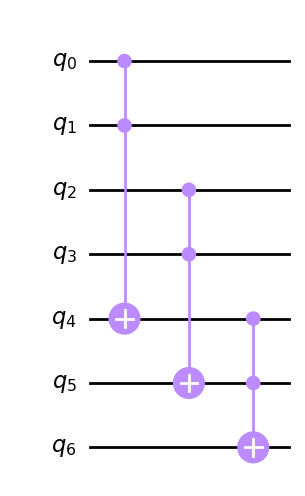

In [212]:
def ccccx():
    qc = QuantumCircuit(7)
    qubitsToMeasure = [0,1,2,3]
    carryQubits = [4,5]
    measureQubit = 6
    if len(qubitsToMeasure) != 4 and len(carryQubits) != 2:
        raise ValueError("Invalid input")
    for i in range(len(carryQubits)):
        qc.ccx(qubitsToMeasure[i*len(carryQubits)], qubitsToMeasure[i*len(carryQubits)+1], carryQubits[i])
    qc.ccx(carryQubits[0], carryQubits[1], measureQubit)
    return qc.to_gate()

qc = QuantumCircuit(7)
qc.append(ccccx(), [0,1,2,3,4,5,6])
qc.decompose().draw(output='mpl')

1. **(D3)** Sukurkite qiskit schemą, kuri turi 4 įvesties kubitus ir kuri kievienam iš jų lygiagrečiai realizuoja  Deustsch algoritmą. Schema turi paskaičiuoti kiek balansuotų funkcijų buvo panaudota.

balanced:  3


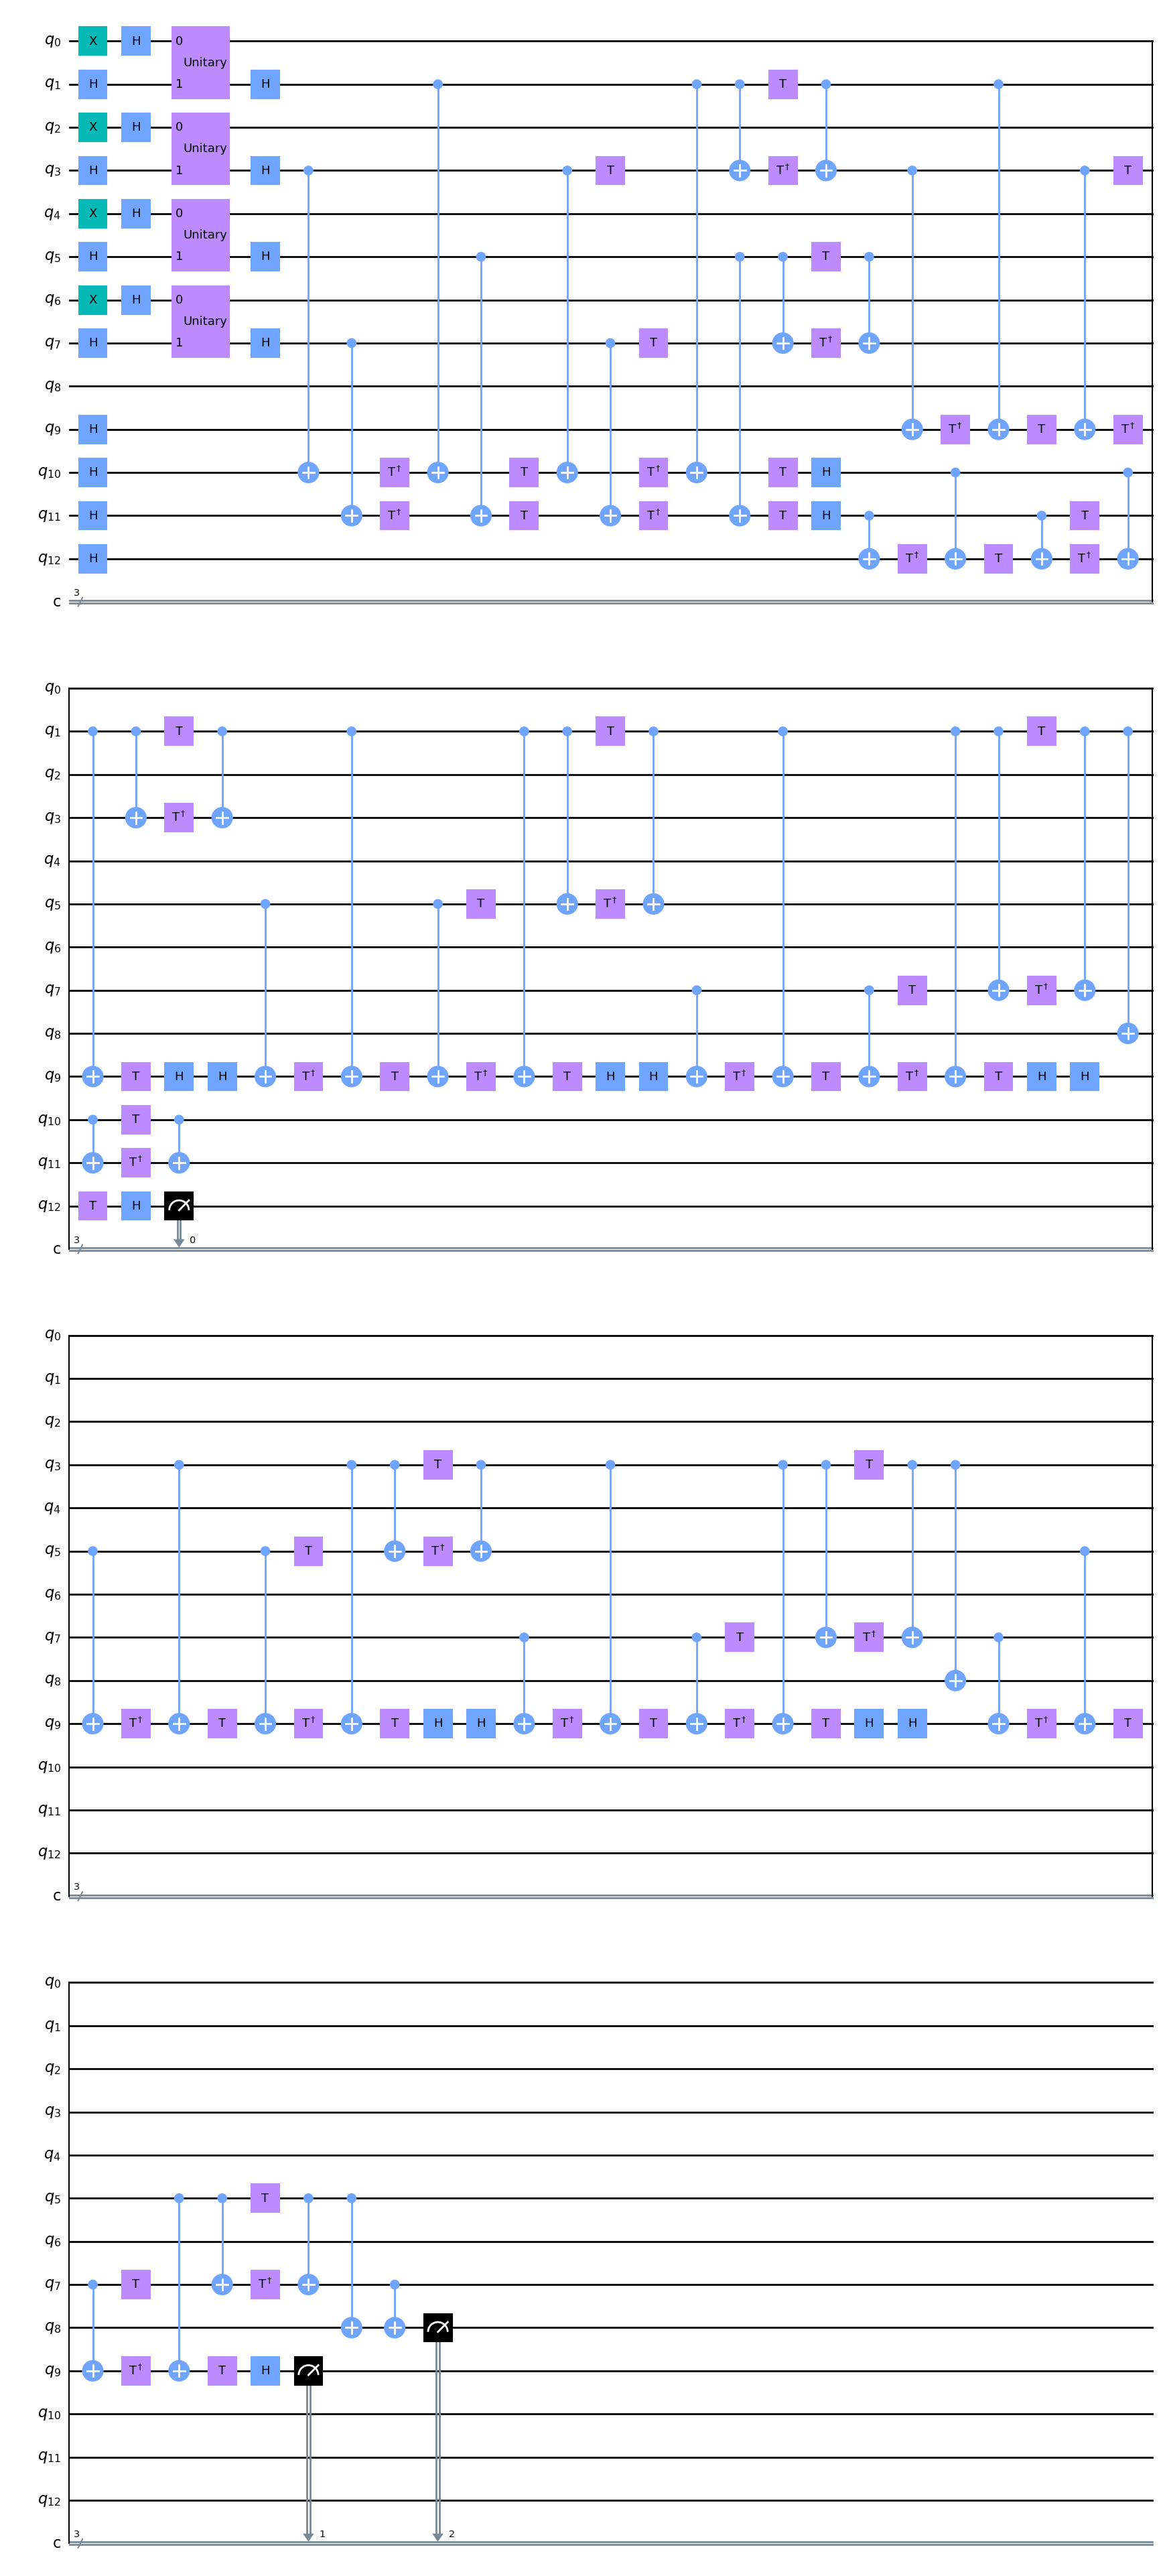

In [213]:
def deuchtToGate(values:str = "00"):
    qc = QuantumCircuit(2)
    deuchAlgorithm(qc, values)
    return qc.to_gate()

def fourQubitsDeuchAlgorithm(values:List[str] = ["00", "00"]):
    qc = QuantumCircuit(8)
    for i in range(4):
        qc.append(deuchtToGate(values[i]), [2*i+1, 2*i])
    return qc.to_gate()

def countQubitsDeuch(qc:QuantumCircuit,values:List[str] = ["00", "00"]) -> int:
    qc.append(fourQubitsDeuchAlgorithm(values), range(8))
    qc.append(ccccx(), [1,3,5,7,10,11,12])
    qc.append(countTwos(), [1,3,5,7,9])
    qc.append(onesCount(), [1,3,5,7,8])
    qc.measure([12,9,8],[0,1,2])

    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend)
    result = job.result()
    counts = result.get_counts(qc)
    count = int((list(counts.keys())[0])[::-1], 2)
    return count

qc = QuantumCircuit(8+5,3)
functions: List[str] = ["10", "01", "01", "00"]
countBalanced = countQubitsDeuch(qc, functions)
print ("balanced: ", countBalanced) 

qc.decompose().decompose().draw(output='mpl')

In [214]:
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
print(counts)

{'110': 1024}


### Deutsch-Jozsa algoritmas (uždaviniai DJ1, DJ2)

1. **(DJ1)** Pagal analogiją su uždaviniu **D1** sukurkite 4 kubitų funkciją, kuri konstruoja $U_f$  matricą Deutsch-Jozsa algoritmui pagal reikšmių tekstinę eilutę. Jeigu Deutsch-Jozsa  funkcija nėra konstanta ar subalansuota reikia grąžinti None. Pvz. eilutė '1111000011110000' atitinka tokią funkciją:


| q3| q2| q1| q0| f |
|---|---|---|---|---|
| 0 | 0 | 0 | 0 | 1 |
| 0 | 0 | 0 | 1 | 1 |
| 0 | 0 | 1 | 0 | 1 |
| 0 | 0 | 1 | 1 | 1 |
| 0 | 1 | 0 | 0 | 0 |
| 0 | 1 | 0 | 1 | 0 |
| 0 | 1 | 1 | 0 | 0 |
| 0 | 1 | 1 | 1 | 0 |
| 1 | 0 | 0 | 0 | 1 |
| 1 | 0 | 0 | 1 | 1 |
| 1 | 0 | 1 | 0 | 1 |
| 1 | 0 | 1 | 1 | 1 |
| 1 | 1 | 0 | 0 | 0 |
| 1 | 1 | 0 | 1 | 0 |
| 1 | 1 | 1 | 0 | 0 |
| 1 | 1 | 1 | 1 | 0 |

In [215]:
def constructUnitaryMatrix(input:str)-> Operator:
    size = len(input)*2
    # size = int(np.log2(len(input)))
    matrix = np.eye(size, size)
    print (matrix)
    # fix it later
    return Operator(matrix)

2. (**DJ2**) Panaudokite anksčiau parašytą funkciją nuosavai Deustch-Jozsa algorimo implementacijai qiskit aplinkoje.

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
{'0000': 1024}


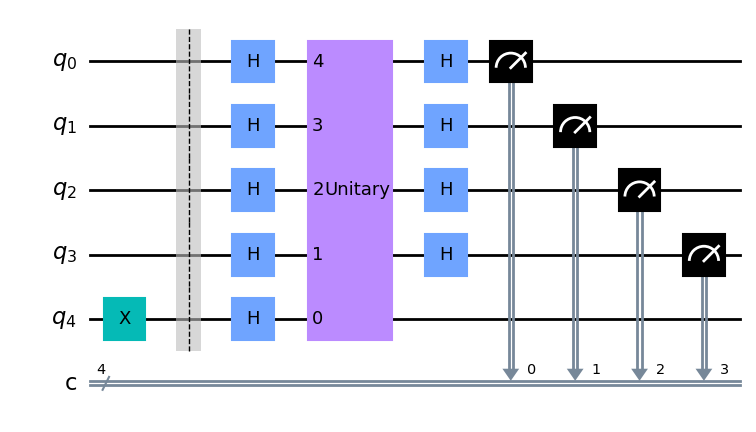

In [216]:
def deuchJozsaAlgorithm(input:str = "1010101010101010"):
    size = int(np.log2(len(input)))
    qc = QuantumCircuit(size+1, size)
    qc.x(size)
    qc.barrier()
    qc.h(range(size+1))

    qc.append(constructUnitaryMatrix(input),range(size,-1,-1))
    qc.h(range(size))
    qc.measure(range(size), range(size))
    return qc

input = "1010101010101010"
qc = deuchJozsaAlgorithm(input)

backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend)
result = job.result()
print (result.get_counts(qc))

qc.draw(output='mpl')

### Bernstein-Vazirani problema

1. (**BV1**) Parašykite funkciją, kuri pagal nurodytą bitų  skaičių generuoja atsitiktinę Bernstein-Vazirani funkciją.

In [217]:
def generateRandomBernsteinVarizaniFunction(size:int = 4) -> str:
    function = ""
    for i in range(size):
        function += str(np.random.randint(2))
    return function

In [218]:
def dj_oracle(case, n): # maybe use this later
    # We need to make a QuantumCircuit object to return
    # This circuit has n+1 qubits: the size of the input,
    # plus one output qubit
    oracle_qc = QuantumCircuit(n+1)
    
    # First, let's deal with the case in which oracle is balanced
    if case == "balanced":
        # First generate a random number that tells us which CNOTs to
        # wrap in X-gates:
        b = np.random.randint(1,2**n)
        # Next, format 'b' as a binary string of length 'n', padded with zeros:
        b_str = format(b, '0'+str(n)+'b')
        print (b_str)
        # Next, we place the first X-gates. Each digit in our binary string 
        # corresponds to a qubit, if the digit is 0, we do nothing, if it's 1
        # we apply an X-gate to that qubit:
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
        # Do the controlled-NOT gates for each qubit, using the output qubit 
        # as the target:
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
        # Next, place the final X-gates
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)

    # Case in which oracle is constant
    if case == "constant":
        # First decide what the fixed output of the oracle will be
        # (either always 0 or always 1)
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)
    
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle" # To show when we display the circuit
    return oracle_gate

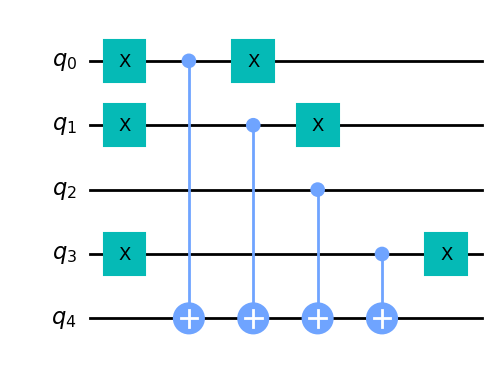

In [219]:
qc = QuantumCircuit(5)
oracle = dj_oracle("balanced", 4)
qc.append(oracle, range(5))
qc.decompose().draw(output='mpl')



2. (**BV2**) Parašykite *klasikinę* funkciją, kuri pagal *n*-bitų  funkciją, kuri užduota kaip tekstinė eilutė (panašiai kaip **DJ1** uždavinyje), patikrina ar ji yra Bernstein-Vazirani funkcija.
